,CasosDia,Temp. Ins. (C),Umi. Ins. (%),Chuva (mm),CasosDiasTarget
Data,,,,,
2020-03-22,3,26.616667,42.500000,4.453936,4
2020-03-23,3,26.462500,52.833333,4.453936,2
2020-03-24,3,24.812500,64.541667,8.800000,2
2020-03-25,1,22.008333,82.000000,28.800000,2
2020-03-26,0,21.225000,83.666667,0.200000,3
...,...,...,...,...,...
2023-12-27,8,22.787500,80.750000,4.453936,3
2023-12-28,4,24.291667,70.416667,4.453936,6
2023-12-29,7,25.687500,69.083333,4.453936,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-03-22 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CasosDia         1380 non-null   int64  
 1   Temp. Ins. (C)   1380 non-null   float64
 2   Umi. Ins. (%)    1380 non-null   float64
 3   Chuva (mm)       1380 non-null   float64
 4   CasosDiasTarget  1380 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 64.7 KB


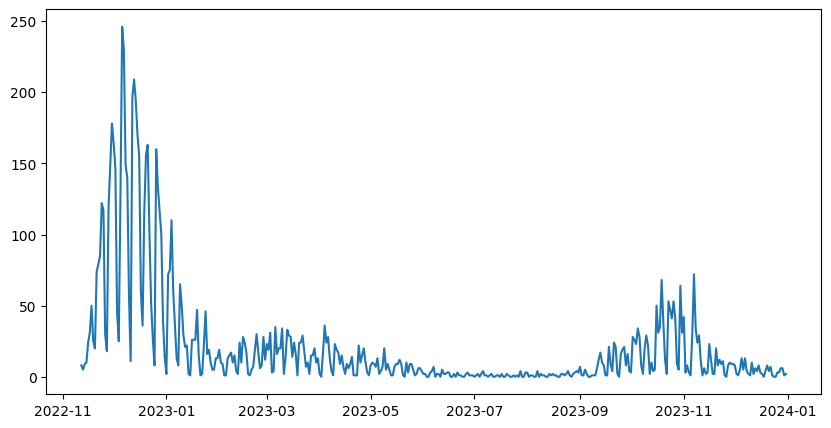

In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



# MLP


In [2]:
#MLP


mseMLP = []
rmseMLP= []
maeMLP= []

p_MlpHiddenLayer = []
p_MlpActivation  = []
p_MlpMaxIter = []
p_MlpLearningRate  = []



print("MLP")
param_grid = {
    'hidden_layer_sizes': [(5,5,5), (5,10,15), (5,10,10), (5,10,15)],
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'solver': ['adam'],
    'max_iter': [400,600,800,1000],
    'learning_rate_init': [0.001, 0.002, 0.003, 0.004,0.005,0.006,0.007,0.008,0.009,0.01]
}
melhor_validacao_mlp = 100000
best_paramsMLP = {}



for i in range(20):
    print(i+1)
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    mlp = MLPRegressor(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )
                    mlp.fit(x_treino, y_treino)
                    opiniao = mlp.predict(x_teste)
                    mse_validacao_mlp = mean_squared_error(y_teste, opiniao)
                    
                    if (mse_validacao_mlp < melhor_validacao_mlp):
                        melhor_validacao_mlp = mse_validacao_mlp
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }


    print(melhor_validacao_mlp)
    print(mse_validacao_mlp)
    print(best_paramsMLP)

    mlp = MLPRegressor(
                    hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                    activation=best_paramsMLP['activation'],
                    solver='adam',
                    max_iter=best_paramsMLP['max_iter'],
                    learning_rate_init=best_paramsMLP['learning_rate_init']
                )
    
    mlp.fit(x_treino, y_treino)
    opiniao_mlp = mlp.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao_mlp).round(2)
    mse = mean_squared_error(y_teste, opiniao_mlp).round(2)
    rmse = np.sqrt(mse).round(2)

    maeMLP.append(mae)
    mseMLP.append(mse)
    rmseMLP.append(rmse)

    p_MlpHiddenLayer.append(best_paramsMLP['hidden_layer_sizes'])
    p_MlpActivation.append(best_paramsMLP['activation'])
    p_MlpMaxIter.append(best_paramsMLP['max_iter'])
    p_MlpLearningRate.append(best_paramsMLP['learning_rate_init'])

# RESULTADOS !!!!
maxp_MlpHiddenLayer = max(set(p_MlpHiddenLayer), key=p_MlpHiddenLayer.count)
maxp_MlpActivation = max(set(p_MlpActivation), key=p_MlpActivation.count)
maxp_MlpMaxIter = max(set(p_MlpMaxIter), key=p_MlpMaxIter.count)
maxp_MlpLearningRate = max(set(p_MlpLearningRate), key=p_MlpLearningRate.count)


media_maeMLP = np.mean(maeMLP)
media_mseMLP = np.mean(mseMLP)
media_rmseMLP = np.mean(rmseMLP)

p_MlpHiddenLayer.append(maxp_MlpHiddenLayer)
p_MlpActivation.append(p_MlpActivation)
p_MlpMaxIter.append(p_MlpMaxIter)
p_MlpLearningRate.append(p_MlpLearningRate)

maeMLP.append(media_maeMLP)
mseMLP.append(media_mseMLP)
rmseMLP.append(media_rmseMLP)

dfMLP = pd.DataFrame({
    'hidden_layer_sizes':p_MlpHiddenLayer,
    'activation':p_MlpActivation,
    'max_iter':p_MlpMaxIter,
    'learning_rate_init':p_MlpLearningRate,
    'MAE': maeMLP,
    'MSE': mseMLP,
    'RMSE': rmseMLP
})




MLP
1
381.69532454899985
429.14435616927545
{'hidden_layer_sizes': (5, 10, 10), 'activation': 'relu', 'max_iter': 800, 'learning_rate_init': 0.001}
2
372.21804427162283
414.30543800067795
{'hidden_layer_sizes': (5, 10, 15), 'activation': 'tanh', 'max_iter': 600, 'learning_rate_init': 0.007}
3
372.21804427162283
405.3125470969366
{'hidden_layer_sizes': (5, 10, 15), 'activation': 'tanh', 'max_iter': 600, 'learning_rate_init': 0.007}
4
372.21804427162283
435.10445252542985
{'hidden_layer_sizes': (5, 10, 15), 'activation': 'tanh', 'max_iter': 600, 'learning_rate_init': 0.007}
5
364.8640894834559
525.0642199338954
{'hidden_layer_sizes': (5, 10, 15), 'activation': 'relu', 'max_iter': 600, 'learning_rate_init': 0.007}
6
364.8640894834559
403.7711383519681
{'hidden_layer_sizes': (5, 10, 15), 'activation': 'relu', 'max_iter': 600, 'learning_rate_init': 0.007}
7
364.8640894834559
441.05077916827094
{'hidden_layer_sizes': (5, 10, 15), 'activation': 'relu', 'max_iter': 600, 'learning_rate_init': 0

In [3]:
print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfMLP)
dfMLP.to_csv('resultadosModelos/dfMLP.csv', sep = ';', index = False, encoding='UTF-8')

O ÚLTIMO VALOR (20) É A MÉDIA !!!


,hidden_layer_sizes,activation,max_iter,learning_rate_init,MAE,MSE,RMSE
0,"(5, 10, 10)",relu,800,0.001,13.6600,419.9500,20.4900
1,"(5, 10, 15)",tanh,600,0.007,13.6900,537.5600,23.1900
2,"(5, 10, 15)",tanh,600,0.007,15.3300,534.8600,23.1300
3,"(5, 10, 15)",tanh,600,0.007,12.3700,407.5800,20.1900
4,"(5, 10, 15)",relu,600,0.007,12.6200,417.8100,20.4400
5,"(5, 10, 15)",relu,600,0.007,13.8200,425.5300,20.6300
6,"(5, 10, 15)",relu,600,0.007,12.4500,389.3400,19.7300
7,"(5, 10, 15)",relu,600,0.007,12.5200,394.7600,19.8700
8,"(5, 10, 15)",relu,600,0.007,12.0100,408.1700,20.2000
9,"(5, 10, 15)",relu,600,0.007,11.4300,380.5100,19.5100


Data
2022-11-12     5.786606
2022-11-13     5.786605
2022-11-14     5.994034
2022-11-15     5.786607
2022-11-16    34.939005
                ...    
2023-12-27     5.791487
2023-12-28     5.786609
2023-12-29     5.798291
2023-12-30     5.786605
2023-12-31     5.786605
Length: 415, dtype: float64


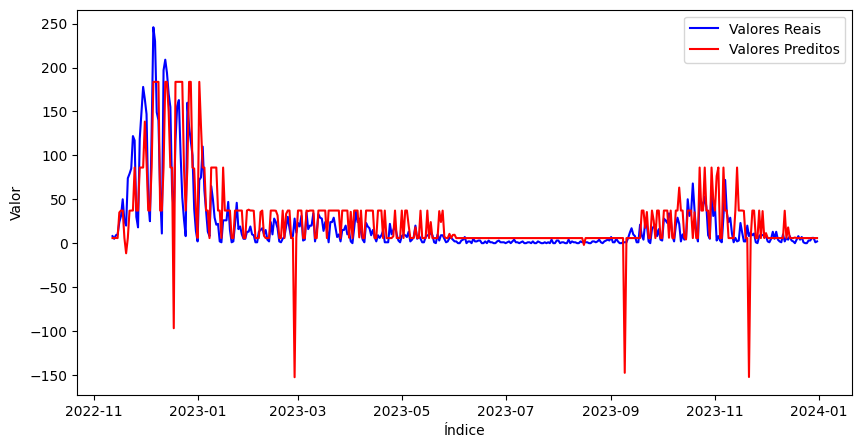

Numero de casos reais:  8737
Numero de casos predito:  10969


In [9]:
len(opiniao_mlp)


serie_MLP = pd.Series(opiniao_mlp, index=x_teste.index)

print(serie_MLP)


plt.figure(figsize=(10, 5))
plt.plot(y_teste, label='Valores Reais', color='blue')
plt.plot(serie_MLP, label='Valores Preditos', color='red')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.savefig('graficos/4-mlp.pdf', dpi=300, bbox_inches = "tight")
plt.show()

n_pred = int(opiniao_mlp.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)